<a href="https://colab.research.google.com/github/franciscogonzalez-gal/statistical-learning-2/blob/main/Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre:** Francisco Gonzalez

**Carnet:**  24002914

In [1]:
!pip install pyclustering --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import calculate_distance_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# ---- Datos sintéticos
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
rng = np.random.RandomState(42)
outliers = rng.uniform(low=-10, high=10, size=(15, 2))
X = np.vstack([X, outliers])


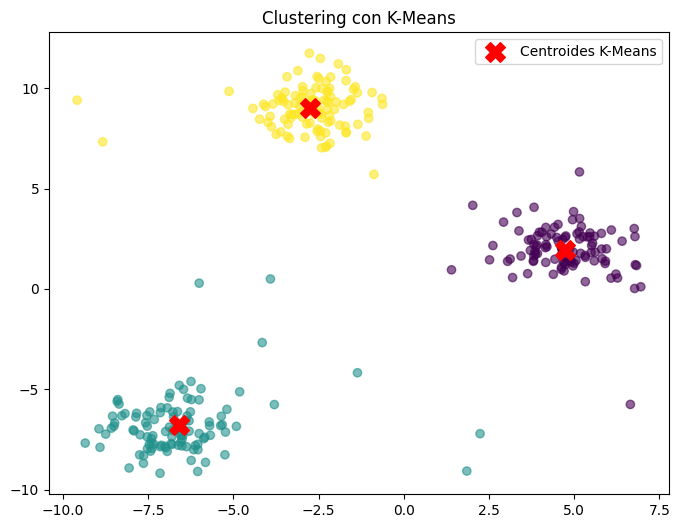

In [3]:
# ---- K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroides K-Means')
plt.title("Clustering con K-Means")
plt.legend()
plt.show()

In [4]:
# ---- K-Medoids con pyclustering
# Elegimos índices iniciales aleatorios como medoides
import random
initial_medoids = random.sample(range(len(X)), 3)

In [5]:

# Distancia
dist_matrix = calculate_distance_matrix(X.tolist())

kmedoids_instance = kmedoids(dist_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

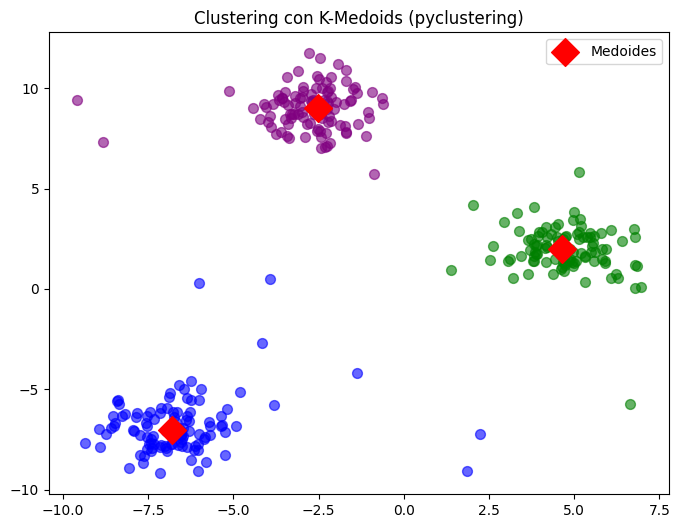

In [6]:
# Visualización
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    pts = X[cluster]
    plt.scatter(pts[:, 0], pts[:, 1], s=50, alpha=0.6, c=colors[i])
plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=200, marker='D', label='Medoides')
plt.title("Clustering con K-Medoids (pyclustering)")
plt.legend()
plt.show()

## Discusión en Grupo

### Gráfico de K-Means
- Los grupos se ven relativamente bien definidos.
- Sin embargo, los **centroides (X rojas)** se ven afectados por los puntos atípicos (outliers), ya que los centroides son la media de cada clúster y pueden desplazarse si existen valores extremos.
- Esto significa que la posición de los centroides no siempre representa fielmente al “cliente típico” del grupo.

### Gráfico de K-Medoids
- Los clústeres también se ven bien definidos, pero la gran diferencia es que los **medoides (rombos rojos)** se ubican en puntos reales del conjunto de datos.
- Esto hace que los medoids sean más robustos frente a los outliers: los puntos extremos no arrastran la ubicación del centro.
- Como resultado, los clústeres se interpretan de manera más estable y representativa.

---

## Comparación entre K-Means y K-Medoids
- **K-Means** es más sensible a los outliers, ya que usa la media para calcular el centro de cada clúster.
- **K-Medoids** maneja mejor los outliers, porque los centros son siempre observaciones reales del dataset y no se ven tan desplazados.
- En un contexto de negocio donde sabemos que existen clientes atípicos, **K-Medoids sería más recomendable** porque dará una segmentación más estable y confiable para tomar decisiones de marketing.

---

## Pregunta de Reflexión Final
Si el gerente de marketing quisiera no solo agrupar clientes, sino también **crear perfiles de clientes sintéticos** para entrenar modelos de recomendación sin usar datos reales (por temas de privacidad), la tecnología sugerida sería el uso de **Generative Models (Modelos Generativos)**, por ejemplo:

- **Generative Adversarial Networks (GANs)**
- **Variational Autoencoders (VAEs)**

Estas técnicas permiten generar datos sintéticos que mantienen las características estadísticas de los clientes reales, pero sin comprometer información sensible.
